In [128]:
#importing the library
import pandas as pd
import numpy as np
#visualization library
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math

# Loading the Dataset

In [117]:
df=pd.read_csv('/kaggle/input/bitcoin/BTC-USD (1).csv')
#loading the dataset

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
3048,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,3.244228e+10
3049,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,2.474639e+10
3050,2023-01-23,22721.087891,23126.486328,22654.304688,22934.431641,22934.431641,2.651870e+10
3051,2023-01-24,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizing the Closing Price 

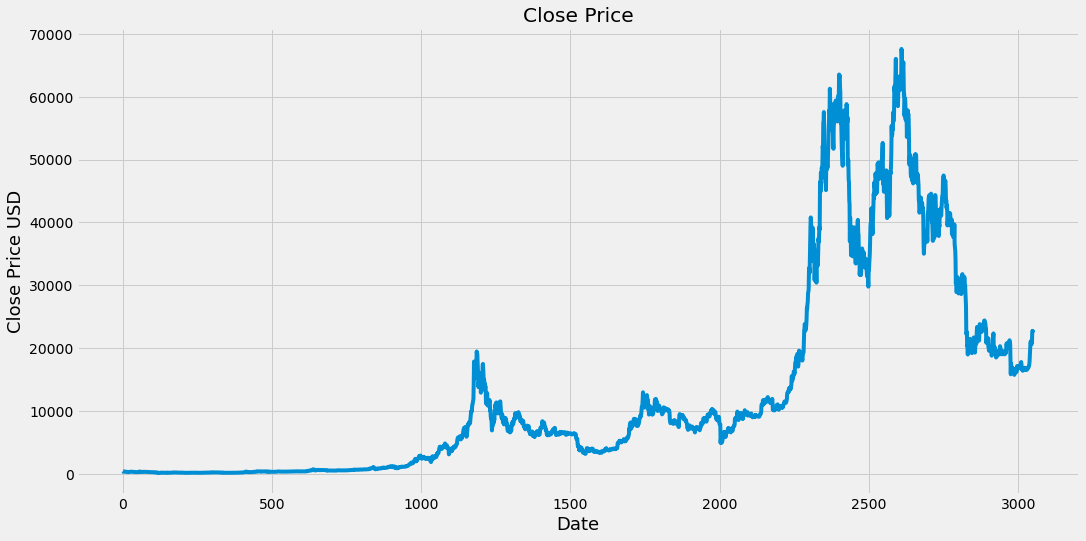

In [118]:
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.show()

# Creating a Function to Calculate Simple Moving Average

In [119]:
def SMA(df,period=1400,column='Close'):
    return df[column].rolling(window=period).mean()


# Creating a new Column to store the 200 SMA

In [120]:
df['200SMA']=SMA(df,period=1400)

In [121]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,200SMA
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,NaN
...,...,...,...,...,...,...,...,...
3048,2023-01-21,22677.427734,23282.347656,22511.833984,22777.625000,22777.625000,3.244228e+10,24616.059552
3049,2023-01-22,22777.986328,23056.730469,22387.900391,22720.416016,22720.416016,2.474639e+10,24629.415444
3050,2023-01-23,22721.087891,23126.486328,22654.304688,22934.431641,22934.431641,2.651870e+10,24642.966416
3051,2023-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.isna().sum()

Date            0
Open            1
High            1
Low             1
Close           1
Adj Close       1
Volume          1
200SMA       1401
dtype: int64

# Creating the Strategy
# i.e. Buy when the 200sma goes below the close price
# Sell when the 200 sma goes above the closing price

In [123]:
len(df)

3053

In [124]:
def strategy(df):
    buy=[] #creating the empty list
    sell=[] #creating the sell list
    flag=0 #this flag indicate if we bought or sold the asset
    buy_price=0 #Place holder for buy last buy price
    buy_count=0 #Number of time we bought the asset
    sell_count=0 #Number of time we sold the asset
    #Creating a loop to go through the data
    for i in range(0, len(df)):
        #we 200 sma crosses above the closes price and flag=0 mean 
        if df['200SMA'][i]>df['Close'][i] and flag==0:
            #Append the close price to the buy list
            buy.append(df['Close'][i])
            #Appending nan to sell list
            sell.append(np.nan)
            #Get the current price to buy to compare later with the 
            #Set the flat to one to indicate a buy
            flag==1
            #Adding a 1 to the buy count
            buy_count+=1
        #Else if the close is below the 200 sma and flag is 1 and 
        # the current close price is above the buy price then we sell the asset
        elif df['200SMA'][i]< df['Close'][i] and flag==1 and buy_price>df['Close'][i]:
            #Append the nan value to the buy list
            buy.append(np.nan)
            #Append the close price to the sell list
            sell.append(df['Close'][i])
            #Reset the buy price
            buy_price=0
            #Resetting the flag to 0 to indicate sell
            flag=0
            #Adding 1 to the sell count
            sell_count+=1
        else:
            sell.append(np.nan)
            buy.append(np.nan)
        #Returning the buy and sell price and counts
    return (buy,sell,buy_count,sell_count)
            
            

# Getting the Buy and Sell Signals

In [127]:
df['Buy']=strategy(df)[0]
df['Sell']=strategy(df)[1]
Number_buys=strategy(df)[2]
Number_sell=strategy(df)[3]

# Getting the Last Buy Price and storing into last buy price

In [129]:
#Creating a variable to store the last buy price
last_buy_price=0
if Number_buys>Number_sell:
    for i in range(0,len(df)):
        if math.isnan(df['Buy'][i])==False:
            last_buy_price=df['Buy'][i]

# Visualiing buy and selling price

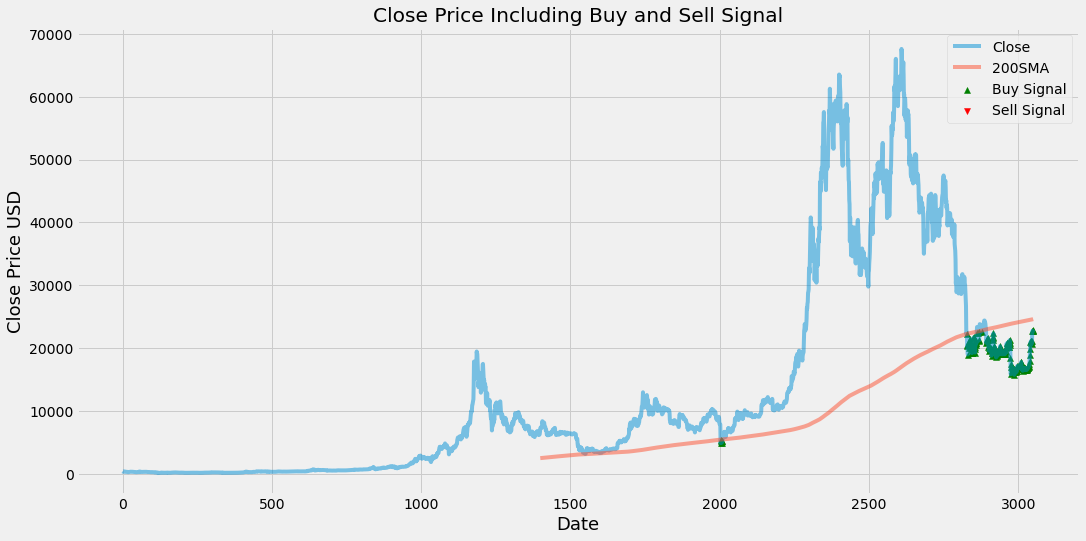

In [132]:
plt.figure(figsize=(16,8))
plt.title('Close Price Including Buy and Sell Signal')
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['200SMA'],alpha=0.5,label='200SMA')
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.legend()
plt.show()

In [134]:
df['Sell'].sum()-df['Buy'].sum()-last_buy_price

-3833388.46046